This notebook includes the elements used to crete a random lat, lon generator within the area of the index. We need rando, lat, lon as inputs for tests to the geocoder.

In [3]:
import init
import constants as cn



ModuleNotFoundError: No module named 'init'

In [2]:
DATADIR = cn.SHAPEFILE_DIR
def read_shapefile(shapefile, column_name, data=DATADIR):
    shapefile = str(shapefile) + '.shp'
    gdf = gpd.read_file(os.path.join(os.pardir, DATADIR, shapefile))
    gdf = gdf.loc[:, (column_name, cn.GEOMETRY)]
    gdf = gdf.to_crs(cn.CRS_EPSG)
    gdf.columns = [cn.KEY, cn.GEOMETRY]
    return gdf
gdf = read_shapefile(cn.BLKGRP_FNAME, cn.BLKGRP_KEY)


In [4]:
def generate_random(number, polygon):
    list_of_points = []
    minx, miny, maxx, maxy = polygon.bounds
    counter = 0
    while counter < number:
        pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if polygon.contains(pnt):
            list_of_points.append(pnt)
            counter += 1
    return list_of_points
            

#SAMPLE A NUMBER OF POINTS df.sample(n)

In [123]:
def random_to_csv(geodataframe, outputfilename):
    points_dict = {}
    lat_lon_pair = []
    for i in range(len(geodataframe['geometry'])):
        random_point= generate_random(1, geodataframe.loc[i,['GEO_ID_GRP', 'geometry']][1])
        lat_lon_pair.append(random_point[0].x)
        lat_lon_pair.append(random_point[0].y)
        points_dict[geodataframe['GEO_ID_GRP'][i]]= lat_lon_pair
        lat_lon_pair = []
    df = pd.DataFrame.from_dict(points_dict, orient='index')
    df.index.name = 'GEO_ID_GRP'
    df.columns = ['lat', 'lon']
    df.to_csv(outputfilename, encoding='utf-8', index=True)
    return df


In [103]:
gdf.head()

,GEO_ID_GRP,Shape_area,geometry
0,530330001001,8.967593e+06,POLYGON ((-122.2841872052759 47.73360555151095...
1,530330001002,3.104000e+06,POLYGON ((-122.2897518162644 47.73373385941476...
2,530330001003,3.990298e+06,POLYGON ((-122.2895587836067 47.72644986052015...
3,530330001004,1.360694e+06,POLYGON ((-122.2924338167398 47.73375285274882...
4,530330001005,2.481027e+06,POLYGON ((-122.2922647847798 47.72647585486412...


In [101]:
# def random_to_csv(geodataframe, outputfilename):
#     random_points = []
#     for i in range(len(geodataframe['geometry'])):
#         random_point= generate_random(1, geodataframe.loc[i,['GEO_ID_GRP', 'geometry']][1])
#         random_points.append(random_point)
    
#     lat_lon_pairs_list = []
#     for list in random_points:
#         for pp in list:
#             lat_lon_dict = {}
#             lat_lon_dict['lat']= pp.x
#             lat_lon_dict['lon']= pp.y
#             lat_lon_pairs_list.append(lat_lon_dict)

#         lat_lon_df = pd.DataFrame(lat_lon_pairs_list)
#         lat_lon_df.to_csv(outputfilename, encoding='utf-8', index=False)



In [124]:
example = random_to_csv(gdf, 'test4.csv')

In [122]:
example.head()


,lat,lon
GEO_ID_GRP,,
530330001001,-122.284994,47.722494
530330001002,-122.294984,47.729968
530330001003,-122.289397,47.721283
530330001004,-122.294759,47.732361
530330001005,-122.293176,47.722467


In [120]:
gdf['geometry'].head()



0    POLYGON ((-122.2841872052759 47.73360555151095...
1    POLYGON ((-122.2897518162644 47.73373385941476...
2    POLYGON ((-122.2895587836067 47.72644986052015...
3    POLYGON ((-122.2924338167398 47.73375285274882...
4    POLYGON ((-122.2922647847798 47.72647585486412...
Name: geometry, dtype: object

In [97]:
len(gdf['geometry'])
gdf['geometry']

0       POLYGON ((-122.2841872052759 47.73360555151095...
1       POLYGON ((-122.2897518162644 47.73373385941476...
2       POLYGON ((-122.2895587836067 47.72644986052015...
3       POLYGON ((-122.2924338167398 47.73375285274882...
4       POLYGON ((-122.2922647847798 47.72647585486412...
5       POLYGON ((-122.296518817057 47.73378584434474,...
6       POLYGON ((-122.2991367770753 47.72472684088635...
7       POLYGON ((-122.3154418176611 47.73397680387622...
8       POLYGON ((-122.3086948168129 47.7339058182076,...
9       POLYGON ((-122.3126507855691 47.72662081179384...
10      POLYGON ((-122.3019538169408 47.73382983237983...
11      POLYGON ((-122.3247328183643 47.73406278347231...
12      POLYGON ((-122.3369818182576 47.73413475762107...
13      POLYGON ((-122.3517728182319 47.73412972571338...
14      POLYGON ((-122.3555708179865 47.73413071738082...
15      POLYGON ((-122.3481417697033 47.72321873770193...
16      POLYGON ((-122.3555507782496 47.72504972198071...
17      POLYGO

In [98]:
random_points = []
#for i in range(len(gdf['geometry'])):
for i in range(10):
    random_point= generate_random(1, gdf.loc[i,['GEO_ID_GRP', 'geometry']][1])
    random_points.append(random_point)
print(random_points)
    


[[<shapely.geometry.point.Point object at 0x111d71e48>], [<shapely.geometry.point.Point object at 0x111d75a90>], [<shapely.geometry.point.Point object at 0x111e75cf8>], [<shapely.geometry.point.Point object at 0x111ef0e80>], [<shapely.geometry.point.Point object at 0x111e9af98>], [<shapely.geometry.point.Point object at 0x111ef0b70>], [<shapely.geometry.point.Point object at 0x111e35c18>], [<shapely.geometry.point.Point object at 0x111eb5278>], [<shapely.geometry.point.Point object at 0x111e6d5f8>], [<shapely.geometry.point.Point object at 0x11279ae80>]]


In [19]:

gdf.head()
    

#print (listarray)
    

,GEO_ID_GRP,Shape_area,geometry
0,530330001001,8.967593e+06,POLYGON ((-122.2841872052759 47.73360555151095...
1,530330001002,3.104000e+06,POLYGON ((-122.2897518162644 47.73373385941476...
2,530330001003,3.990298e+06,POLYGON ((-122.2895587836067 47.72644986052015...
3,530330001004,1.360694e+06,POLYGON ((-122.2924338167398 47.73375285274882...
4,530330001005,2.481027e+06,POLYGON ((-122.2922647847798 47.72647585486412...


In [18]:
lat_lon_df.head()

NameError: name 'lat_lon_df' is not defined

In [12]:
lat_lon_df.to_csv('test_points.csv', encoding='utf-8', index=False)

NameError: name 'lat_lon_df' is not defined

In [13]:
type(nparray[1])

NameError: name 'nparray' is not defined

In [35]:
len(nparray[1])

2

In [37]:
nparray[1][1]

47.72660256689483

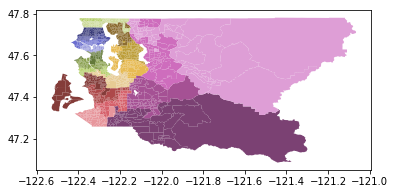

In [38]:
gdf.loc[:,['GEO_ID_GRP', 'geometry']].plot(cmap="tab20b")  

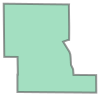

In [145]:
gdf.loc[10,['GEO_ID_GRP', 'geometry']][1]

In [146]:
generate_random(3, gdf.loc[10,['GEO_ID_GRP', 'geometry']][1])


In [164]:
x

[<shapely.geometry.point.Point object at 0x12421d400>, <shapely.geometry.point.Point object at 0x12421a668>, <shapely.geometry.point.Point object at 0x12421a208>]
[[-122.30653225   47.73161672]
 [-122.30500362   47.72775478]
 [-122.30531148   47.72604459]]
